In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn import preprocessing
from sklearn import svm
from joblib import dump, load
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family='Microsoft YaHei')

# 加载数据集
# 训练集
train_set = load('train_set')
train_label = load('train_label')
# 测试集
test_set = load('test_set')
test_label = load('test_label')

# 使用 squeeze 函数转换为 1 维数组
train_label = np.squeeze(train_label)

In [2]:
# 构建 支持向量机 模型并进行训练：

# 设置参数
params = {
    'kernel': 'rbf',  # 核函数选择 ⾼斯径向核函数
    'C': 1.0 ,  # 设置 正则化参数
    'gamma': 0.1  # 设置 核函数的系数
}

# 创建SVC模型对象
model = svm.SVC(decision_function_shape='ovo',kernel=params['kernel'], C=params['C'], gamma=params['gamma'], max_iter=200, class_weight='balanced',probability=True)

# 模型训练
model.fit(train_set, train_label)

e:\Anaconda\anaconda\envs\deeplearning\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(class_weight='balanced', decision_function_shape='ovo', gamma=0.1,
    max_iter=200, probability=True)

In [3]:
# 模型评估

from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import accuracy_score,classification_report # 引入准确度评分函数

# 进行预测并评估模型性能：
# 进行预测
y_pred = model.predict(test_set)

score = r2_score(test_label, y_pred)
print('*'*50)
print(' 支持向量机 模型分数--R^2:', score)


print('*'*50)
# 模型 评估
print("训练集准确率: %.3f" % accuracy_score(train_label, model.predict(train_set)))
print("测试集准确率: %.3f" % accuracy_score(test_label, y_pred))
print("测试集结果评估报告为：\n",classification_report(test_label,y_pred))

**************************************************
 支持向量机 模型分数--R^2: 0.7561299885716872
**************************************************
训练集准确率: 0.853
测试集准确率: 0.847
测试集结果评估报告为：
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        72
         1.0       0.95      1.00      0.97        69
         2.0       1.00      0.24      0.38        72
         3.0       1.00      1.00      1.00        63
         4.0       0.90      1.00      0.95        71
         5.0       0.84      0.57      0.68        63
         6.0       0.48      0.89      0.63        65
         7.0       1.00      1.00      1.00        67
         8.0       0.69      0.77      0.73        75
         9.0       1.00      1.00      1.00        82

    accuracy                           0.85       699
   macro avg       0.89      0.85      0.83       699
weighted avg       0.89      0.85      0.83       699



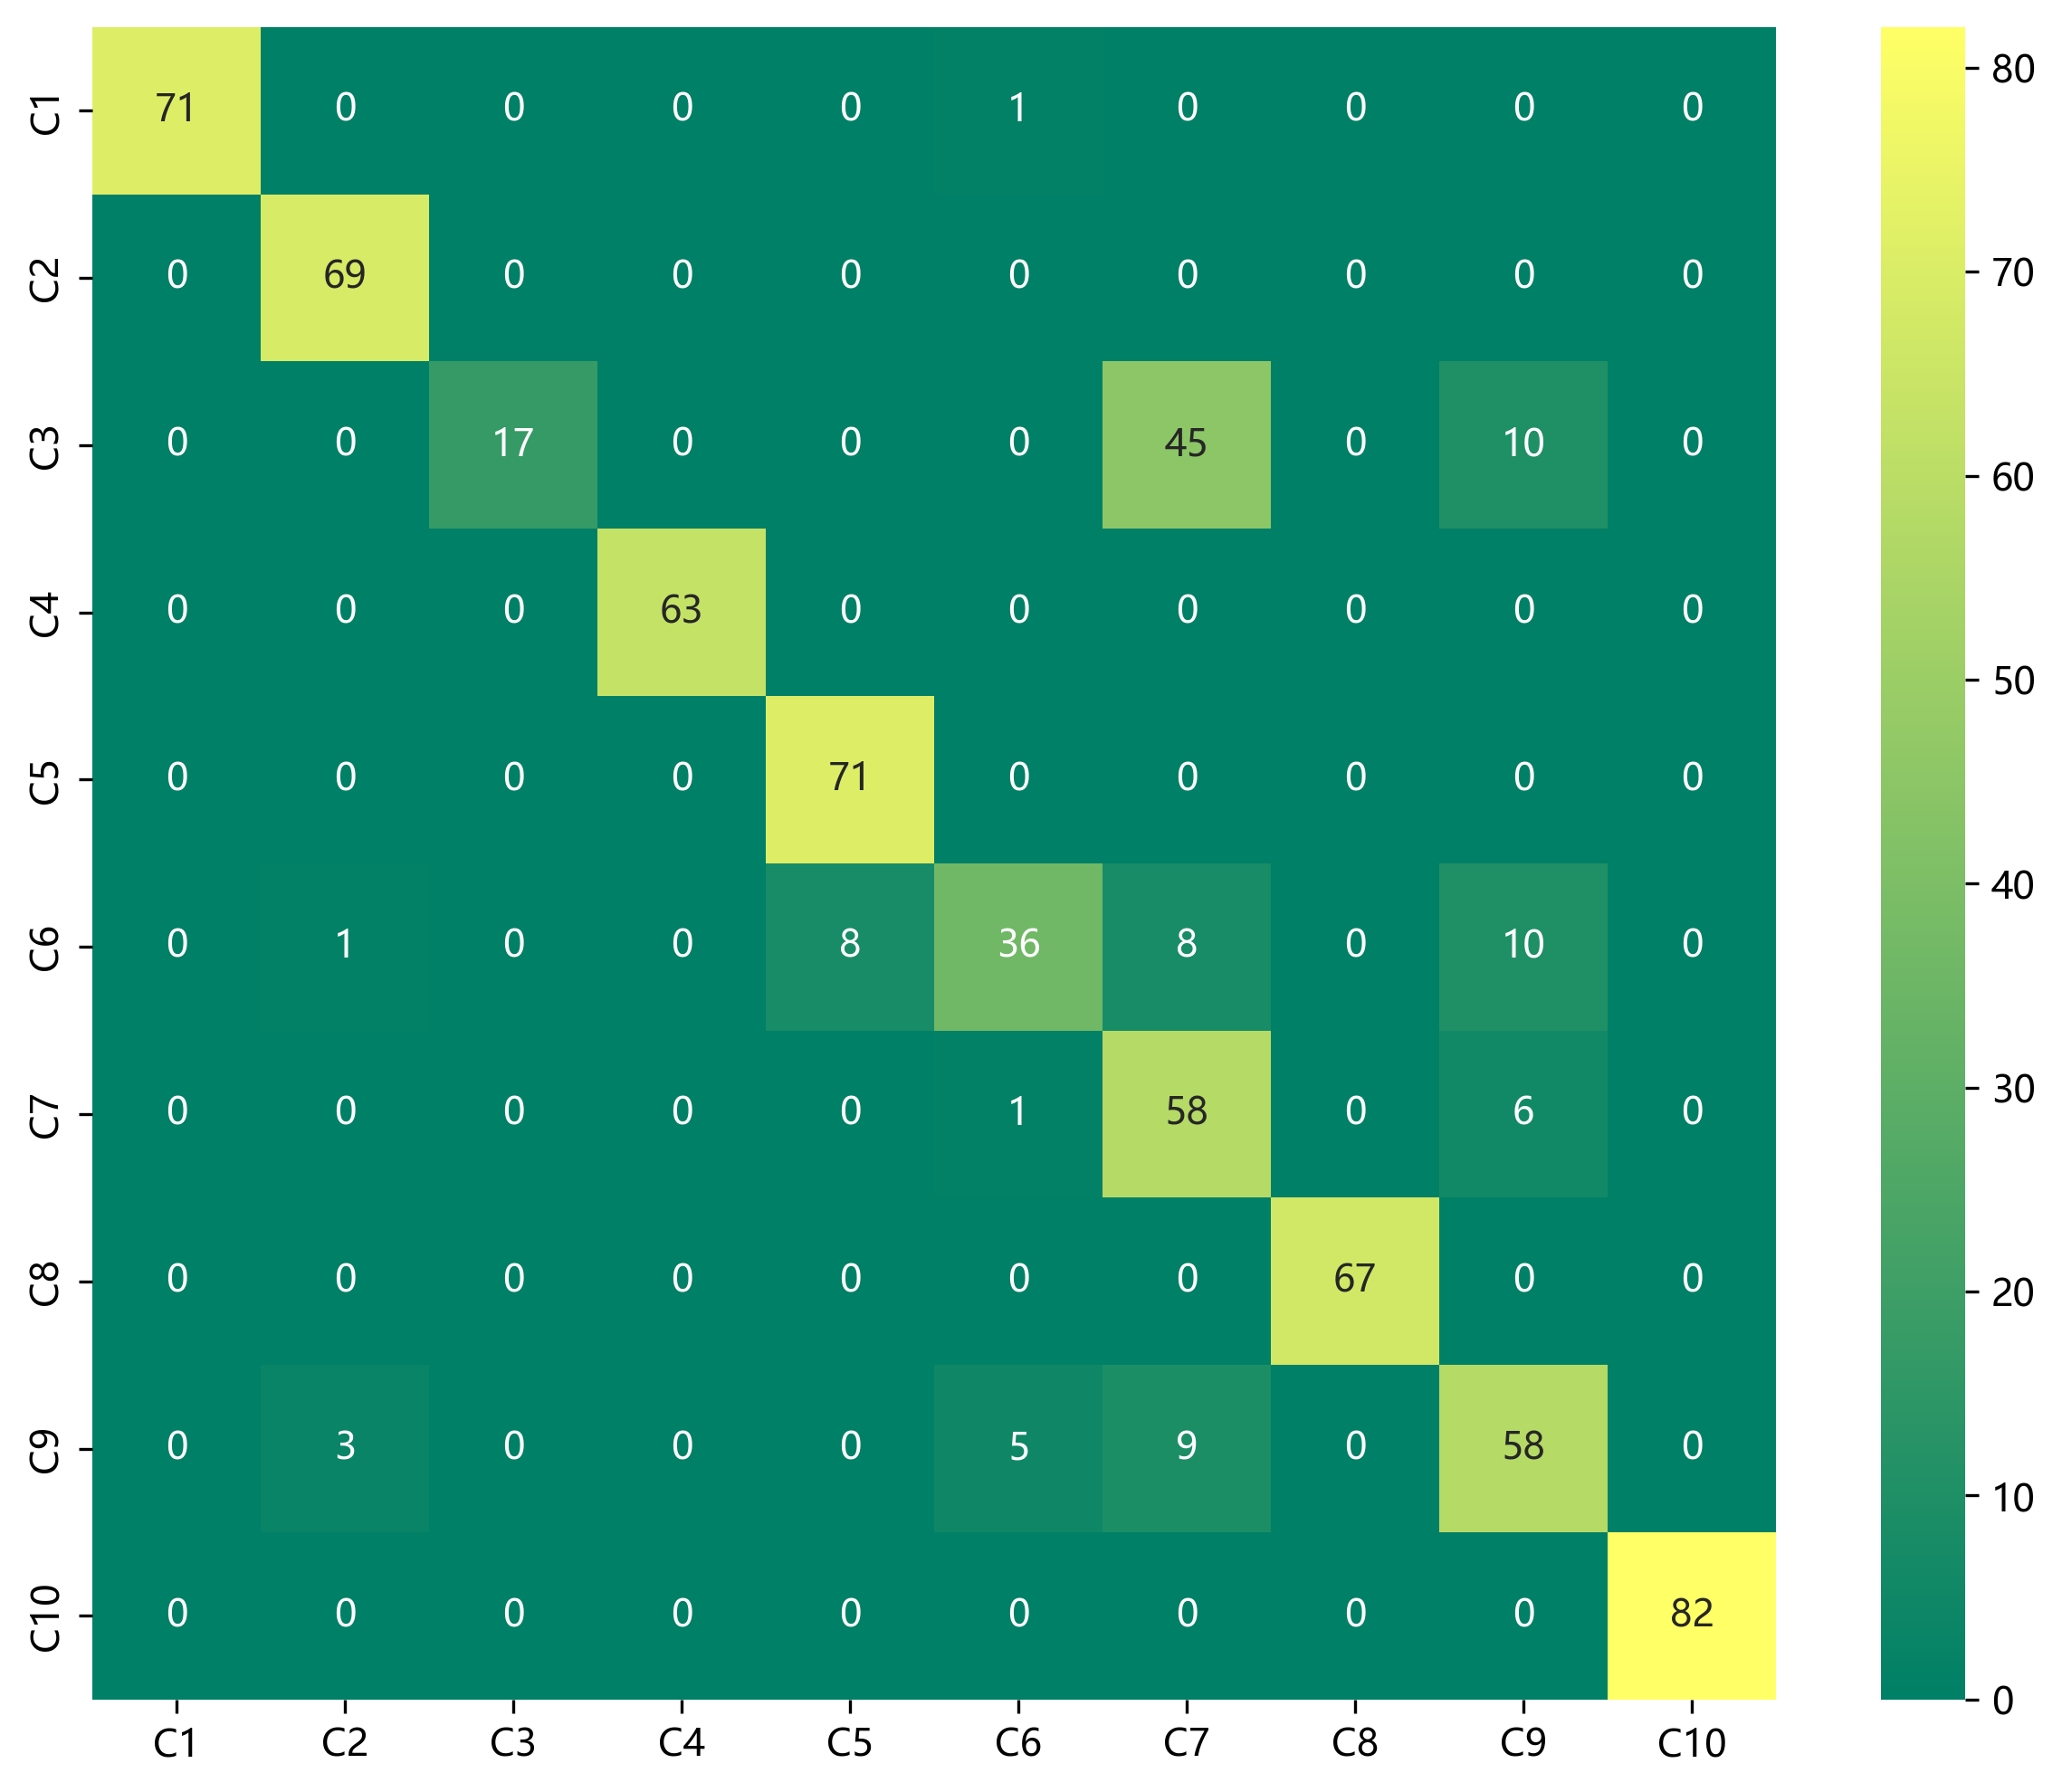

In [4]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix
import matplotlib.ticker as ticker
# 绘制混淆矩阵
import matplotlib.pyplot as plt
import seaborn as sns
# 原始标签和自定义标签的映射
label_mapping = {
    0: "C1",1: "C2",2: "C3",3: "C4",4: "C5",
    5: "C6",6: "C7",7: "C8",8: "C9",9: "C10",
}

# 混淆矩阵
confusion_mat = confusion_matrix(test_label, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(10, 8), dpi=300)
sns.heatmap(confusion_mat,  xticklabels=label_mapping.values(), yticklabels=label_mapping.values(),annot=True, fmt='d', cmap='summer')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
plt.show()